<!--
import data_analytics.github as github
print(github.create_jupyter_notebook_header("mrzakiakkari", "data-mining-algorithms", "assessment-3-data-mining-algorithms-and-stats.ipynb", "master"))
-->
<table style="margin: auto;"><tr><td><a href="https://mybinder.org/v2/gh/mrzakiakkari/data-mining-algorithms/master?filepath=assessment-3-data-mining-algorithms-and-stats.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open In Binder"/></a></td><td>online editors</td><td><a href="https://colab.research.google.com/github/mrzakiakkari/data-mining-algorithms/blob/master/assessment-3-data-mining-algorithms-and-stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></td></tr></table>

# Assessment 3 Data Mining Algorithms

Where appropriate add two cells below the question.  One a code cell to hold any code you used, and the second a markdown cell to hold the explanation.  
You are to submit your notebook file, which should be labelled yourname_assign3
Note the questions are allocated different weightings, these will be scaled to 100%.

In [1]:
from pandas import DataFrame
from statistics import NormalDist
import seaborn
import numpy as np
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import seaborn as sns  #To visualise
from data_analytics.graphs import display_correlation_matrix_pyramid_heatmap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
diamonds_dataframe: DataFrame = seaborn.load_dataset("diamonds")
diamonds_dataframe.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Diamonds meta data
#### price 
price in US dollars (\$326--\$18,823)<br>

#### carat 
weight of the diamond (0.2--5.01)<br>

#### cut 
quality of the cut (Fair, Good, Very Good, Premium, Ideal)<br>

#### color 
diamond colour, from J (worst) to D (best)<br>

#### clarity 
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))<br>

#### x 
length in mm (0--10.74)<br>

#### y 
width in mm (0--58.9)<br>

#### z 
depth in mm (0--31.8)<br>

#### depth 
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)<br>

#### table 
width of top of diamond relative to widest point (43--95)<br>

**Q1.** In the diamonds data set identify quantitative variables that have  linear relationships
<div style="text-align: right"> (5 marks) </div>

Exploratory Data Analysis

In [3]:
diamonds_dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds_dataframe.shape

(53940, 10)

In [5]:
diamonds_dataframe.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Points to notice:**

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [6]:
invalid_diamonds_dataframe = diamonds_dataframe[(diamonds_dataframe["x"]==0) |
                   (diamonds_dataframe["y"]==0) |
                   (diamonds_dataframe["z"]==0)]

invalid_diamonds_dataframe.sample()

diamonds_dataframe.drop(invalid_diamonds_dataframe.index, inplace=True)
del invalid_diamonds_dataframe
diamonds_dataframe.shape

(53920, 10)

In [7]:
correlation_dataframe = diamonds_dataframe[["carat", "depth", "table", "price", "x", "y", "z"]].corr()

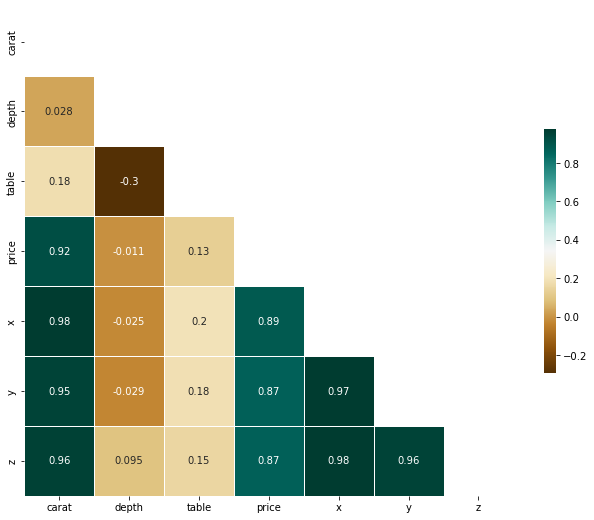

In [8]:
display_correlation_matrix_pyramid_heatmap(correlation_dataframe);

<p class="Caption">Correlation Matrix Heat Map Pyramid</p>

Consider correlation Threshold &GreaterEqual; 0.85.  

In [9]:
correlation_dataframe = correlation_dataframe.unstack().reset_index()
correlation_dataframe = correlation_dataframe.rename(
    columns={
    "level_0": "Varaible 1",
    "level_1": "Varaible 2",
    0: "Correlation"
})

correlation_cutoff_value = .85

correlation_dataframe = correlation_dataframe[(
    correlation_dataframe['Correlation'] >= correlation_cutoff_value)]

#HACK!
correlation_dataframe = correlation_dataframe[(
    correlation_dataframe['Correlation'] != 1)]
#HACK!


key = correlation_dataframe[['Varaible 1','Varaible 2']].apply(lambda x: tuple(sorted(x)), axis='columns')

correlation_dataframe = correlation_dataframe.loc[~key.duplicated()]

**quantitative variables that have  linear relationships**

In [10]:
correlation_dataframe

,Varaible 1,Varaible 2,Correlation
3,carat,price,0.921592
4,carat,x,0.977779
5,carat,y,0.953991
6,carat,z,0.961048
25,price,x,0.887231
26,price,y,0.867864
27,price,z,0.868206
33,x,y,0.974918
34,x,z,0.975435
41,y,z,0.956744


**Q2.** Create a linear regression model predicting the price of a diamond using <b><u>ONE independent variable</u></b>.
<div style="text-align: right"> (15 marks) </div>

Price correlates with x, y, z and caret

In [11]:
def run_linear_regression(dataframe: DataFrame, x_columns: list, y_column: list):
    X = dataframe[x_columns]
    y = dataframe[y_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    reg = LinearRegression()

    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    print(x_columns, "=>", y_column[0])

    print(f"score:      {reg.score(X, y):.4f}")  #Return the coefficient of determination of the prediction.
    print("coef_:      ", reg.coef_)  #Estimated coefficients for the linear regression problem.
    print("intercept_: ", reg.intercept_)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("rmse:       ", rmse)
    return reg

In [12]:
run_linear_regression(diamonds_dataframe,["carat"], ["price"])

['carat'] => price
score:      0.8493
coef_:       [[7766.69418047]]
intercept_:  [-2259.7599076]
rmse:        1530.8844596923043


LinearRegression()

#### Test the different <i>quantitative</i> columns in order to identify which independent variable has the most predictive power for price.  
In a markdown cell provide justification as to why you chose the variable  
Remember to use a reasonable split on the data to create test and train subsets 

In [13]:
run_linear_regression(diamonds_dataframe,["carat"], ["price"])
run_linear_regression(diamonds_dataframe,["x"], ["price"])
run_linear_regression(diamonds_dataframe,["y"], ["price"])
run_linear_regression(diamonds_dataframe,["z"], ["price"])

['carat'] => price
score:      0.8493
coef_:       [[7771.04097573]]
intercept_:  [-2263.87603194]
rmse:        1504.2192077901575
['x'] => price
score:      0.7872
coef_:       [[3166.26366492]]
intercept_:  [-14219.33563649]
rmse:        1830.3703101792842
['y'] => price
score:      0.7531
coef_:       [[2999.30203793]]
intercept_:  [-13275.4955385]
rmse:        1860.778325393268
['z'] => price
score:      0.7537
coef_:       [[4881.09348794]]
intercept_:  [-13352.79636449]
rmse:        1874.755439017094


LinearRegression()

The carat has the most predictive power based on the highest predictive score of 0.8493.

**Q3.** Create a linear regression model predicting the price of a diamond using <b><u>MULTIPLE independent variables</u></b>.
<div style="text-align: right"> (15 marks) </div>

In [14]:
run_linear_regression(diamonds_dataframe,["carat", "x", "y", "z"], ["price"])

['carat', 'x', 'y', 'z'] => price
score:      0.8547
coef_:       [[10535.76878626  -944.97932626   156.1245366   -676.74593464]]
intercept_:  [2440.93147418]
rmse:        1561.9935903374783


LinearRegression()

# Some theory
Create a markdown cell under each of the following quesions, and put in your answer in there.

**Q4.**. What are dummy variables, what is the Dummy Variable Trap and how can we overcome it?<div style="text-align: right"> (5 marks) </div>

**Answer**  
A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something (e.g., a 0 may indicate a placebo and 1 may indicate a drug). The Dummy Variable trap is a scenario in which the independent variables are multicollinear - a scenario in which two or more variables are highly correlated; in simple terms one variable can be predicted from the others. To overcome the Dummy variable Trap, we drop one of the columns created when the categorical variables were converted to dummy variables by one-hot encoding. This can be done because the dummy variables include redundant information.

**Q5.** With regard to a linear regression model explain the meaning and importance of :  

R^2: 
**Answer**:R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.
<div style="text-align: right"> (5 marks) </div>  
The coefficient (weight) associated with an independent variable:  

**Answer** :The regular regression coefficients that you see in your statistical output describe the relationship between the independent variables and the dependent variable. The coefficient value represents the mean change of the dependent variable given a one-unit shift in an independent variable. Consequently, you might think you can use the absolute sizes of the coefficients to identify the most important variable. After all, a larger coefficient signifies a greater change in the mean of the independent variable.
<div style="text-align: right"> (5 marks) </div>  
The Intercept:

**Answer**:The intercept (often labeled as constant) is the point where the function crosses the y-axis. In some analysis, the regression model only becomes significant when we remove the intercept, and the regression line reduces to Y = bX + error.
<div style="text-align: right"> (5 marks) </div>  
root mean squared error:  

**Answer**:Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.
<div style="text-align: right"> (5 marks) </div>

**Q6.** The mean life of a battery is 50 hours with a standard deviation of 6 hours. The mean life of batteries follow a normal distribution.  The manufacturer advertises that they will replace all batteries that last less than 38 hours. If 100,000 batteries were produced, how many would they expect to replace?  In your answer explain your workings 
<div style="text-align: right"> (5 marks) </div>

$
X \sim \operatorname{Normal}(\mu = 50, \sigma = 6) \\
p = P(X < 38) = P\left(\frac{X - \mu}{\sigma} < \frac{38 - 50}{6} \right) = P(Z < -2) \approx 0.02275,\\
$

In [15]:
from statistics import NormalDist

x = 38
p = NormalDist(mu=50, sigma=6).cdf(x)
print(f"P(X < {x}) = {p:.4}")

n=100_000
print(f"Answer:{(p*n):.0f}")

P(X < 38) = 0.02275
Answer:2275


where Z∼Normal(0,1) is a standard normal random variable. This means any single battery has only about a 2.275% chance of not lasting more than 38 hours.

**Q 7.** A quality control process uses a grading scale to grade the quality of the batteries.  1000 batteries are produced. It is assumed that the scores are normally distributed with a mean score of 75 and a standard deviation of 15.
In your answer, explain your workings.

$
X \sim \operatorname{Normal}(\mu = 75, \sigma = 15) \\
$

a)	How many batteries will have scores between 45 and 75?

$
p = P(X < 75) = P\left(\frac{X - \mu}{\sigma} < \frac{75 - 75}{15} \right) = P(Z < 0) \approx 0.5,\\
$

$
p = P(X < 45) = P\left(\frac{X - \mu}{\sigma} < \frac{45 - 75}{15} \right) = P(Z < -2) \approx 0.02275,\\
$


In [16]:
number_of_batteries = 1_000

In [17]:
x1 = 75
p1 = NormalDist(mu=75, sigma=15).cdf(x1)
print(f"P(X < {x1}) = {p1:.4}")
x2 = 45
p2 = NormalDist(mu=75, sigma=15).cdf(x2)
print(f"P(X < {x2}) = {p2:.4}")
p = p1 - p2
print(f"P({x2} < X < {x1}) = {p:.4}")
print(f"Answer:{p * number_of_batteries:.0f}")

P(X < 75) = 0.5
P(X < 45) = 0.02275
P(45 < X < 75) = 0.4772
Answer:477


b)  If 60 is the lowest passing score, how many batteries are expected to pass the quality control check?

$ P(x \ge 60)= 1 - P(x<60) $

$ P(X \ge 60) = P\left(\frac{X - \mu}{\sigma} \ge \frac{60 - 75}{15} \right) = P(Z \ge -1) \approx 0.84134 $

In [18]:
x = 60
p = 1 - NormalDist(mu=75, sigma=15).cdf(x)
print(f"P(X > {x}) = {p:.4}")
print(f"Answer:{p * number_of_batteries:.0f}")

P(X > 60) = 0.8413
Answer:841


<div style="text-align: right"> (10 marks) </div>

**Q8.** The length of time the batteries are on the supermarket shelf before being sold is a mean of 12 days and a standard deviation of 3 days.  It can be assumed that the number of days on the shelf follows a normal distribution.  Answer the following questions, explain your workings for each.<br>

$
X \sim \operatorname{Normal}(\mu = 12, \sigma = 3) \\
$

**(a)** About what percent of the batteries remain on the shelf between 9 and 15 days?<br>

$ P(9 < X < 15) =  P(X < 15) -  P(X < 9) $

$
P(X < 15) = P\left(\frac{X - \mu}{\sigma} < \frac{15 - 12}{3} \right) = P(Z < 1) \\
P(X < 9) = P\left(\frac{X - \mu}{\sigma} < \frac{9 - 12}{3} \right) = P(Z < -1) \\
$

In [19]:
x1 = 15
p1 = NormalDist(mu=12, sigma=3).cdf(x1)
print(f"P(X < {x1}) = {p1:.4}")
x2 = 9
p2 = NormalDist(mu=12, sigma=3).cdf(x2)
print(f"P(X < {x2}) = {p2:.4}")
p = p1 - p2
print(f"P({x2} < X < {x1}) = {p:.4}")
print(f"Answer:{p:.2%}")

P(X < 15) = 0.8413
P(X < 9) = 0.1587
P(9 < X < 15) = 0.6827
Answer:68.27%


**(b)** About what percent of the batteries remain on the shelf last between 12 and 15 days?

$ P(12 < X < 15) =  P(X < 15) -  P(X < 12) $

$
P(X < 15) = P\left(\frac{X - \mu}{\sigma} < \frac{15 - 12}{3} \right) = P(Z < 1) \\
P(X < 12) = P\left(\frac{X - \mu}{\sigma} < \frac{12 - 12}{3} \right) = P(Z < 0) \\
$

In [20]:
x1 = 15
p1 = NormalDist(mu=12, sigma=3).cdf(x1)
print(f"P(X < {x1}) = {p1:.4}")
x2 = 12
p2 = NormalDist(mu=12, sigma=3).cdf(x2)
print(f"P(X < {x2}) = {p2:.4}")
p = p1 - p2
print(f"P({x2} < X < {x1}) = {p:.4}")
print(f"Answer:{p:.2%}")

P(X < 15) = 0.8413
P(X < 12) = 0.5
P(12 < X < 15) = 0.3413
Answer:34.13%


**(c)** About what percent of the batteries remain on the shelf last 6 days or less?

$
p = P(X < 6) = P\left(\frac{X - \mu}{\sigma} > \frac{6 - 12}{3} \right) = P(Z > -2) \\
$

In [21]:
x = 6
p = NormalDist(mu=12, sigma=3).cdf(x)
print(f"P(X < {x}) = {p:.4}")
print(f"Answer:{p:.2%}")

P(X < 6) = 0.02275
Answer:2.28%


**(d)** About what percent of the batteries remain on the shelf last 15 or more days?

$ P(X \ge 15) = 1 - P(X < 15) $

$
P(X \ge 15) = P\left(\frac{X - \mu}{\sigma} \ge \frac{15 - 12}{3} \right) = P(Z \ge 1)
$

In [22]:
x = 15
p = 1 - NormalDist(mu=12, sigma=3).cdf(x)
print(f"P(X > {x}) = {p:.4}")
print(f"Answer:{p:.2%}")

P(X > 15) = 0.1587
Answer:15.87%


<div style="text-align: right"> (10 marks) </div>

**Q 9.** An online shopping store maintains the shopping history of users so that future predictions can be made about which products will appeal to which type of customer.  <br>
The following baskets are noted. <br>

            1 ABC 
            2 ABCD
            3 BC
            4 ABD
            5 BC
            6 BCD
            7 BD
            8 B
            9 A
            10 AC
            
Calculate the Support and the Confidence, that a potential customer who adds A, and B to their shopping basket is likely to add product C.
In your answer, explain your workings.
<div style="text-align: right"> (10 marks) </div>

**Answer**  
Transactions number: 10
Rule:A&B&rArr;C

Support =frq(X, Y)/N   

Confidence = frq(X, Y)/frq(X)  

frq of A&B is 3  
frq of A&B&C is 2  
Support =frq(A&B, C)/N = 2/10 = 0.2    
Support =frq(A&B, C)/frq(A&B) = 2/3 = 0.67  

**10.** Which data algorithm would you choose for the following scenerios.  In your answer please explain your choice, as to why it is the most appropriate, in brief how the alogritm works, and what the expected outcomes would be.

(a) the battery company you work for is considering opening a new manufacturing plant in Europe, and has come down to the two last choices - Ireland or Poland.  You have data such as the utility costs, employment rates, mean salary for the location, and grants available for the Government, such as the IDA.  Which algorithm would you use to help you choose?

# <span style="color:red">Finish</span>

**Answer:** Regression Analysis would be the suited algorithm for this. This is because the Regression Analysis helps determine different levels of customer satisfactions and how they affect customer loyalty and how service levels can be affected by for example the weather.
Regression analysis tries to define the dependency between variables. It assumes a one-way causal effect from one variable to the response of another variable. Independent variables can be affected by each other but it does not mean that this dependency is both ways as is the case with correlation analysis. A regression analysis can show that one variable is dependent on another but not vice-versa
By using the Regression Line it helps determine the most positive correlation line from the manufacturing plant of both Ireland and Poland and it is easy to interpret, can adopt any data situation and can use many variables to predict one.    


(b) the software company you work for monitors users online time, access to the SaaS, number of purchases, length of time online, the number of sessions, length of session etc.  They are interested in predicting which users are likely to be retained and which are likely to churn.  What algorithm would help provide an insight to this problem?  

# <span style="color:red">Finish</span>

**Answer:** Classification Analysis would be the suited approach for this. Classification Analysis is a systematic process for obtaining important and relevant information about data, and metadata - data about data. The classification analysis helps identifying to which of a set of categories different types of data belong. Classification analysis is closely linked to cluster analysis as the classification can be used to cluster data.
Classification analyses a set of training data (i.e. a set of objects whose class label is known) and constructs a model for each class based on the features in the data.  
such as if users are retained or not and another example to classify which user is likely to churn. Classification as a technique complements clustering. Clustering creates the buckets or boxes and classification puts new cases into them. It parallels the distinction between supervised and unsupervised learning in machine learning, which has to do with whether you actually have a label or a category membership for cases or not.


<div style="text-align: right"> (20 marks) </div><br>